# Data Preprocessing:-





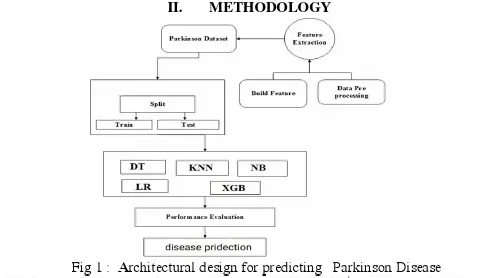
#Image is by International Journal for Research in Applied Science & Engineering Technology (IJRASET)

In [82]:
#Importing the basic libraries:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics 

In [83]:
#Getting the dataset called parkinsons.csv(#Since the data is in my jupyter notebook no need of writting the path)

data = pd.read_csv("parkinsons.csv")   
data


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


## "status" column is the target variable.

#1 --> indicates that the patient has parkinson disease

#0 --> indicates no parkinson disease

In [84]:
#So will create the data and target variables:-

my_data = data.drop(columns=["name","status"]).values #SInce we are removing the variable name and status so no need of converting name to numerical value
print("\nData Variable:-\n", my_data)

my_target = data.iloc[: ,17].values
print("\nTarget Variable:-\n", my_target)


Data Variable:-
 [[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]

Target Variable:-
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


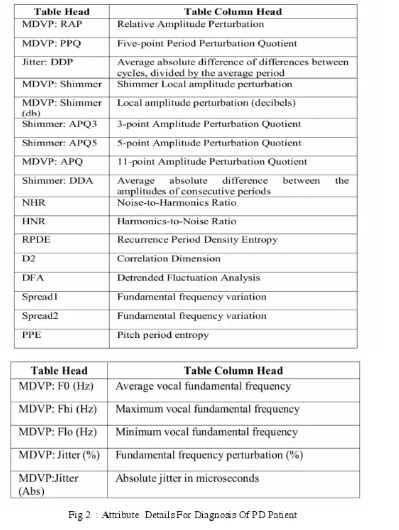
#Image is by International Journal for Research in Applied Science & Engineering Technology (IJRASET)

In [85]:
#Will find out is there any null values in this dataset:-

data.isnull().sum()


name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## Since the data is numerical and it doesn't contain any NAN values will proceed with the data scaling method

In [86]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()

my_data = scaling.fit_transform(my_data)
print(my_data)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


#Since the data is ready for Supervised learning use the below methods:-

We have to Split dataset using train test method

Logistic Regression

SVM(Support Vector Machine)

Decision Tree

KNN

NaiveBaye's using Multinomial and Gaussian Method


# Hold-out Method:-

In [87]:
from sklearn.model_selection import train_test_split

my_data_train, my_data_test, my_target_train, my_target_test = train_test_split(my_data, my_target, test_size=0.3)

print(my_target_test)

[1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1]


## DECISION TREE:-

In [88]:
from sklearn import tree


DT_model = tree.DecisionTreeClassifier()
DT_fitting = DT_model.fit(my_data_train, my_target_train)
DT_prediction = DT_fitting.predict(my_data_test)


print("Accuracy :", round(metrics.accuracy_score(my_target_test, DT_prediction),2)*100, "%")
print("-----------------------------------------")
print("Confusion Matrix")
print(metrics.confusion_matrix(my_target_test, DT_prediction))
print("-----------------------------------------")
print("Classification Report :", metrics.classification_report(my_target_test, DT_prediction))




Accuracy : 92.0 %
-----------------------------------------
Confusion Matrix
[[ 9  3]
 [ 2 45]]
-----------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.94      0.96      0.95        47

    accuracy                           0.92        59
   macro avg       0.88      0.85      0.86        59
weighted avg       0.91      0.92      0.91        59



## KNN:-

In [89]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier()
KNN_fitting = KNN_model.fit(my_data_train, my_target_train)
KNN_predicition = KNN_fitting.predict(my_data_test)

print("Accuracy :", round(metrics.accuracy_score(my_target_test, KNN_predicition),2)*100 , "%")
print("----------------------------------------")
print("Confusion Matrix")
print(metrics.confusion_matrix(my_target_test, KNN_predicition))
print("----------------------------------------")
print("Classification Report :", metrics.classification_report(my_target_test, KNN_predicition))

Accuracy : 93.0 %
----------------------------------------
Confusion Matrix
[[ 9  3]
 [ 1 46]]
----------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.94      0.98      0.96        47

    accuracy                           0.93        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.93      0.93      0.93        59



## Naive Baye's:-

In [90]:
from sklearn.naive_bayes import GaussianNB

Naive_model = GaussianNB()
Naive_fitting = Naive_model.fit(my_data_train, my_target_train)
Naive_prediction = Naive_fitting.predict(my_data_test)


print("Accuracy :", round(metrics.accuracy_score(my_target_test, Naive_prediction),2)*100,"%")
print("----------------------------------------")
print("Confusion Matrix")
print(metrics.confusion_matrix(my_target_test, Naive_prediction))
print("----------------------------------------")
print("Classifiction Report :", metrics.classification_report(my_target_test, Naive_prediction))

Accuracy : 75.0 %
----------------------------------------
Confusion Matrix
[[12  0]
 [15 32]]
----------------------------------------
Classifiction Report :               precision    recall  f1-score   support

           0       0.44      1.00      0.62        12
           1       1.00      0.68      0.81        47

    accuracy                           0.75        59
   macro avg       0.72      0.84      0.71        59
weighted avg       0.89      0.75      0.77        59



## LogisticRegression:-

In [91]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_fitting = LR_model.fit(my_data_train, my_target_train)
LR_prediction = LR_fitting.predict(my_data_test)

print("Accuracy :", round(metrics.accuracy_score(my_target_test, LR_prediction),2)*100, "%")
print("----------------------------------------")
print("Confusion Matrix")
print(metrics.confusion_matrix(my_target_test, LR_prediction))
print("----------------------------------------")
print("Classification Report :", metrics.classification_report(my_target_test, LR_prediction))

Accuracy : 88.0 %
----------------------------------------
Confusion Matrix
[[ 8  4]
 [ 3 44]]
----------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.92      0.94      0.93        47

    accuracy                           0.88        59
   macro avg       0.82      0.80      0.81        59
weighted avg       0.88      0.88      0.88        59



## XGBoost:-


In [92]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_fitting = XGB_model.fit(my_data_train, my_target_train)
XGB_predicition = XGB_fitting.predict(my_data_test)

print("Accuracy :", round(metrics.accuracy_score(my_target_test, XGB_predicition),2)*100,"%")
print("----------------------------------------")
print("Confusion Matrix")
print(metrics.confusion_matrix(my_target_test, XGB_predicition))
print("----------------------------------------")
print("Classification Report :", metrics.classification_report(my_target_test, XGB_predicition))

[18:49:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 93.0 %
----------------------------------------
Confusion Matrix
[[ 9  3]
 [ 1 46]]
----------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.94      0.98      0.96        47

    accuracy                           0.93        59
   macro avg       0.92      0.86      0.89        59
weighted avg       0.93      0.93      0.93        59



C:\Users\alara\data_science\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


##  Support Vecctor Machine:-



In [93]:
from sklearn import svm

SVM_model = svm.SVC(kernel = "linear")
SVM_fitting = SVM_model.fit(my_data_train, my_target_train)
SVM_prediction = SVM_fitting.predict(my_data_test)

print("Accuracy :", round(metrics.accuracy_score(my_target_test, SVM_prediction),2)*100,"%")
print("----------------------------------------")
print("Confusion Matrix")
print(metrics.confusion_matrix(my_target_test, SVM_prediction))
print("----------------------------------------")
print("Classification Report :", metrics.classification_report(my_target_test, SVM_prediction))

Accuracy : 86.0 %
----------------------------------------
Confusion Matrix
[[ 7  5]
 [ 3 44]]
----------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.90      0.94      0.92        47

    accuracy                           0.86        59
   macro avg       0.80      0.76      0.78        59
weighted avg       0.86      0.86      0.86        59



## Comparison Table:-

|Metric     |  DT | KNN | NB  | LR  | XGB | SVM | 
|---------  |:----|:---:|:---:|:----|-----|-----|
|Accuracy(%)|75.0 |92.0 |71.0 |80.0 | 86.0| 81.0|
|Precision  |0.86 |0.92 |0.91 |0.82 | 0.88| 0.84|
|Recall     |0.80 |0.98 |0.69 |0.93 | 0.96| 0.93|
|F1-score   |0.83 |0.95 |0.78 |0.87 | 0.91| 0.88|
|support    |45   | 45  | 45  | 45  | 45  |  45 |


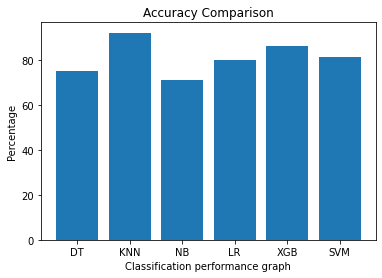

In [94]:
x = np.array(["DT", "KNN", "NB", "LR", "XGB", "SVM"])
y = np.array([75.0, 92.0, 71.0, 80.0, 86.0, 81.0])

plt.bar(x,y)
plt.title("Accuracy Comparison")
plt.xlabel("Classification performance graph")
plt.ylabel("Percentage")
plt.show()

                                                     **ANALYSIS OF RESULTS**
 
According to the performance measurements of three classification algorithms are presented in figure. The results clearly show that the KNN reached to the highest accuracy(92%) and XGB achieved the second highest accuracy. 
Where as Naive Baye's has achieved lowest accuracy (71%) , respectively. Finally, KNN is the highest performer by overall performance.

                                                      **CONCLUSION**
In this analysis, we have illustrated five supervised machine learning approaches. Afterwards, we evaluated the performance of the five classifiers which are used in the performance of parkinson disease and assessed their performance using different statistical methods. THe tentative performances shows that the KNN have achieved the highest performance than the other four classifiers within the parkinson datasets. It is 92% hence we can say that KNN perform good comparative to other classifier. 
This analysis has used five machine learning techniques for the detection of parkinson diseasr based on several parameters this application will be able to detect in parkinson disease in very few minutes and notify dangerous probabtility of having disease. 
In very minimal steps we can predict the person is healthy or PD patient.